# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()
#df.replace('Not given', np.nan)


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
df.shape

(1898, 9)

#### Observations: The data has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

- The data types of order_id, customer_id, food_preparation_time and delivery_time are int64.
- The data types of restaurant_name, cuisine_type, day_of_the_week and rating variables are object.
- The data type of cost_of_the_order variable is float64.




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
print(df.isna().sum()) ## Check missing values
print('*' * 80)
print(df.info())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-

#### Observations:
- All columns have 1898 observations and there are no missing and/or null values in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
df.describe().T
#df.describe(exclude = 'number').T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
The minimum, average, and maximum time it takes for food to be prepared once an order is placed 20, 27.4 and 35 minutes, respetively.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
print(df['rating'].value_counts())

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


#### Observations:Out of a total of 1898 orders, 736 orders are not rated. The minimum rating is 3. The numbers of orders which have rating of 5, 4 and 3 are  588, 386, and 188, respectively.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

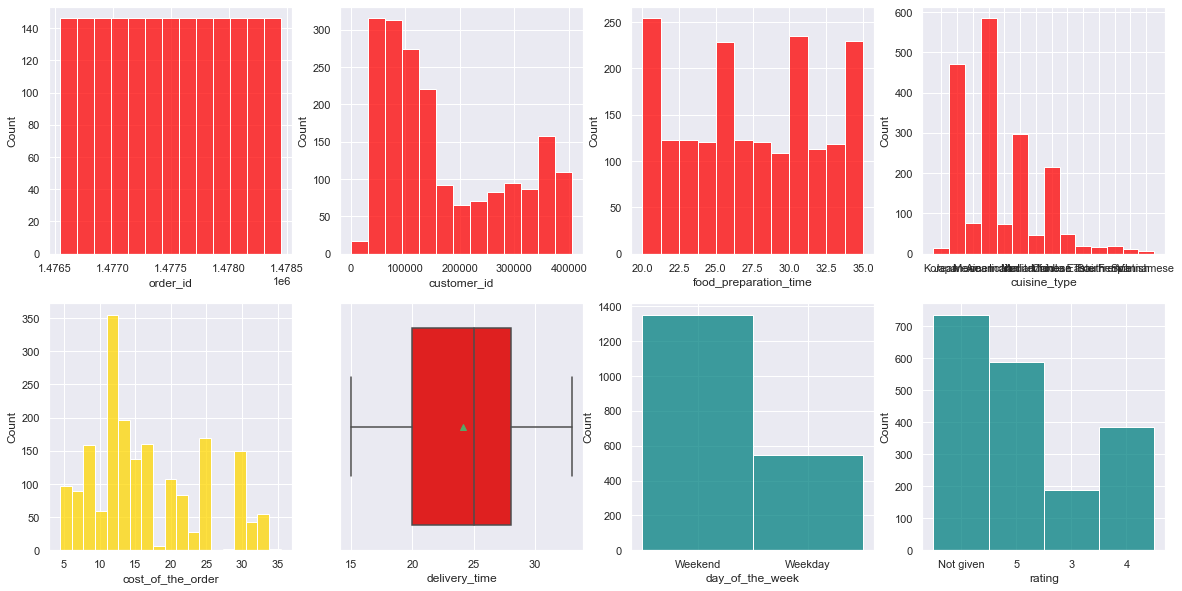

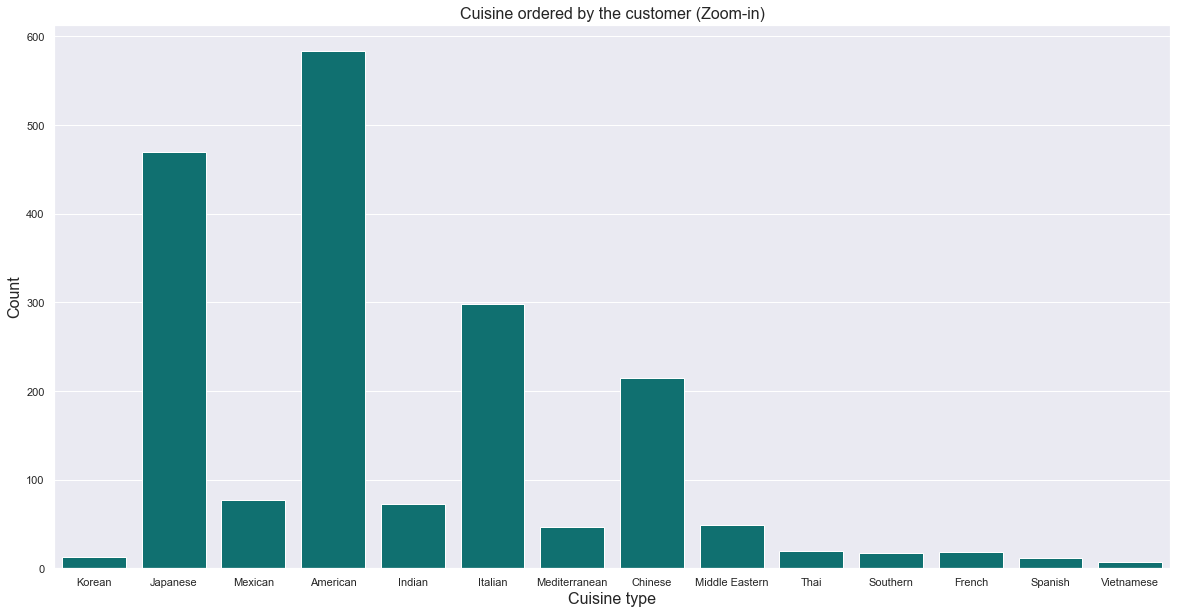

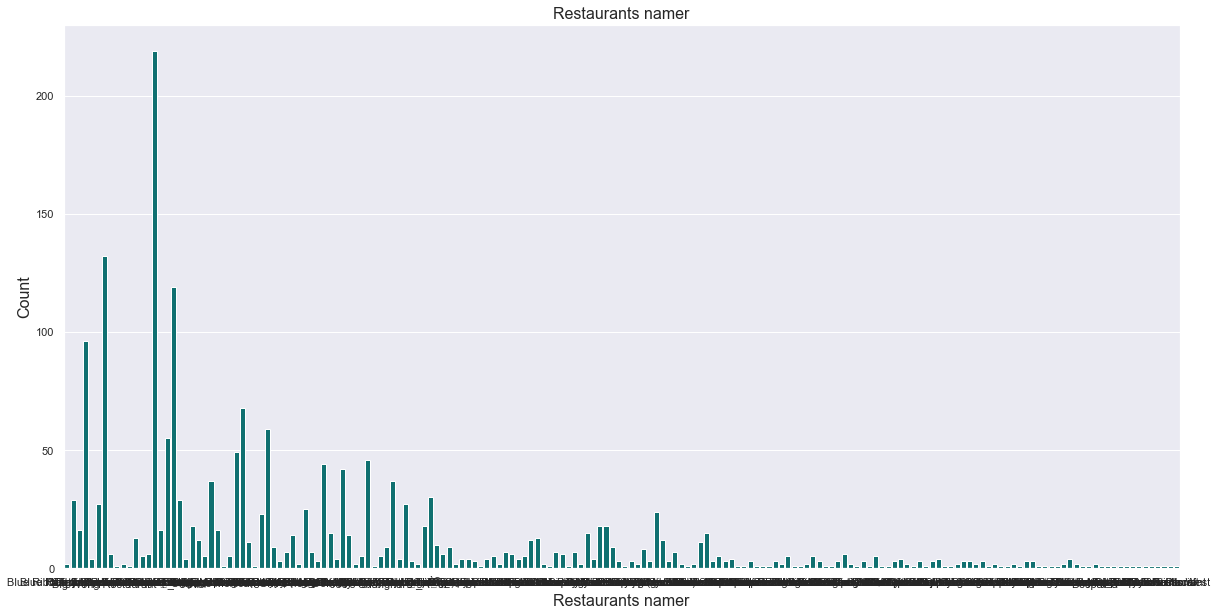

In [8]:

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
#Order ID
sns.histplot(x=df.order_id,color="red", kde=False, bins="auto", ax=axs[0, 0])
#Customer ID
sns.histplot(x=df.customer_id, color="red", kde=False, bins="auto", ax=axs[0, 1])
#restaurant_name
sns.histplot(x=df.food_preparation_time, color="red", kde=False, bins="auto", ax=axs[0, 2])

#cuisine_type 
sns.histplot(x=df.cuisine_type, color="red", kde=False, bins="auto", ax=axs[0, 3])
#Cost of the order
sns.histplot(x=df.cost_of_the_order,color="gold", kde=False, bins="auto", ax=axs[1, 0])
#Delivery time
sns.boxplot(x=df.delivery_time,showmeans=True, color='red', ax=axs[1, 1])
#Day of the week
sns.histplot(x=df.day_of_the_week,  color="teal", kde=False, bins="auto", ax=axs[1, 2])
sns.histplot(x=df.rating,  color="teal", kde=False, bins="auto", ax=axs[1, 3])
plt.show()

    #cuisine_type zoom-in
plt.figure(figsize = (20, 10))  
sns.countplot(x=df.cuisine_type,  color="teal")
plt.xlabel("Cuisine type", size=16)
plt.ylabel("Count", size=16)
plt.title("Cuisine ordered by the customer (Zoom-in)", size=16)
plt.show()
#Restaurant name
plt.figure(figsize = (20, 10))  
sns.countplot(x=df.restaurant_name,  color="teal")
plt.xlabel("Restaurants namer", size=16)
plt.ylabel("Count", size=16)
plt.title("Restaurants namer", size=16)
plt.show()



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [9]:
#Top 5 restaurants in terms of the number of orders received
print(df['restaurant_name'].value_counts(ascending=False).head())
print('*' * 80)
    #The least 5 restaurants in terms of the number of orders received
print(df['restaurant_name'].value_counts(ascending=True).head())


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64
********************************************************************************
'wichcraft            1
Haru Gramercy Park    1
Philippe Chow         1
La Follia             1
Dos Caminos Soho      1
Name: restaurant_name, dtype: int64


#### Observations:
The top 5 restaurants in terms of the number of orders (n) received are Shake Shack (n=219), the Meatball Shop (n=132), Blue Ribbon Sushi (n=119), Blue Ribbon Fried Chicken (n=96) and Parm (n=68). The data shows that Shake Shack restaurant recieved the highest order. 


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [10]:

print(df[(df.day_of_the_week == 'Weekend')].cuisine_type.value_counts(ascending=False).head())



American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64


#### Observations:
The data shows that American recieved the highest order on weekends (total =415 orders on weekends). This imples it is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [11]:

round((df[df.cost_of_the_order > 20].cost_of_the_order.value_counts().sum())/(df.cost_of_the_order.value_counts().sum())*100,2) 


29.24

#### Observations:
The data shows that 29.24% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

24 2


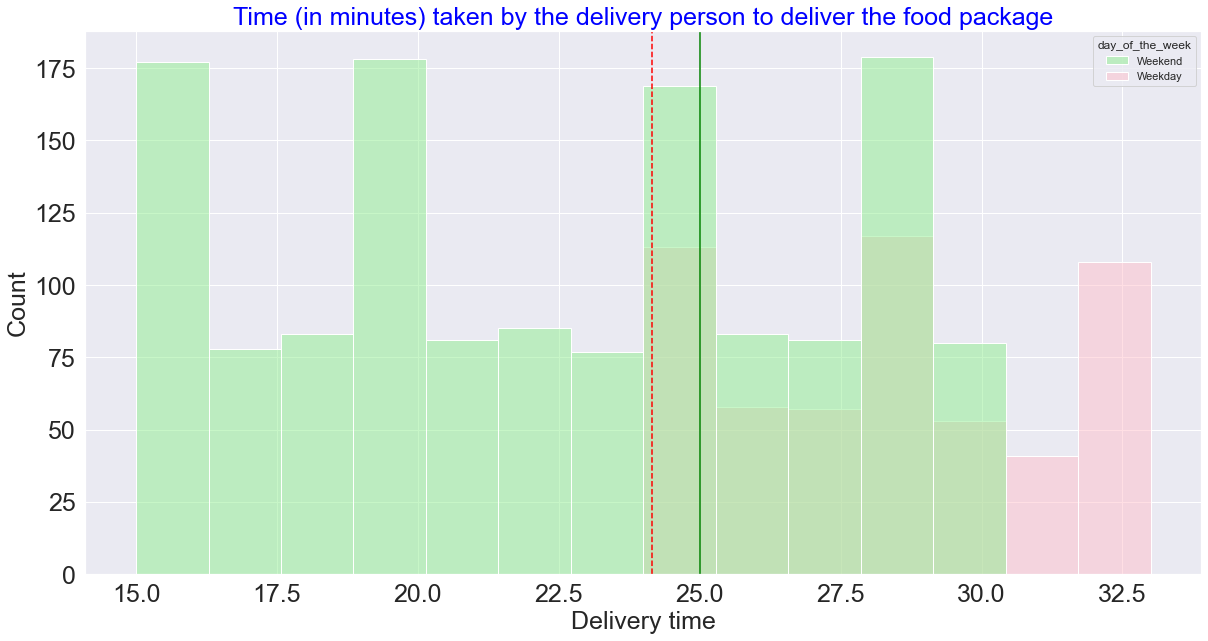

In [12]:
   # mean delivery time
    
print(round(np.mean(df.delivery_time)),2)

#plot
plt.figure(figsize = (20, 10))  
sns.histplot(data=df,x=df.delivery_time, kde=False,color="blue", bins="auto", hue='day_of_the_week', palette=['lightgreen', 'pink'])
plt.axvline(np.mean(df.delivery_time), color='red', linestyle='--')      # Add mean to the histogram
plt.axvline(np.median(df.delivery_time), color='green', linestyle='-') # Add median to the histogram
plt.xlabel("Delivery time", size=25)
plt.ylabel("Count", size=25)
plt.title("Time (in minutes) taken by the delivery person to deliver the food package", size=25, color= 'blue')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()



#### Observations:
The mean order delivery time is 24.2 minutes The delivery time (in minutes) is shown in the histogram plot (the vertical dashed and green lines show the mean and meadian values of the delivery time). 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [13]:
# Write the code here
print(df['customer_id'].value_counts())


52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64


#### Observations:
The top 3 most frequent customers have IDs of 52832 (with number of orders=13),47440 (with number of orders=10) and 83287 (with number of orders=9). 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


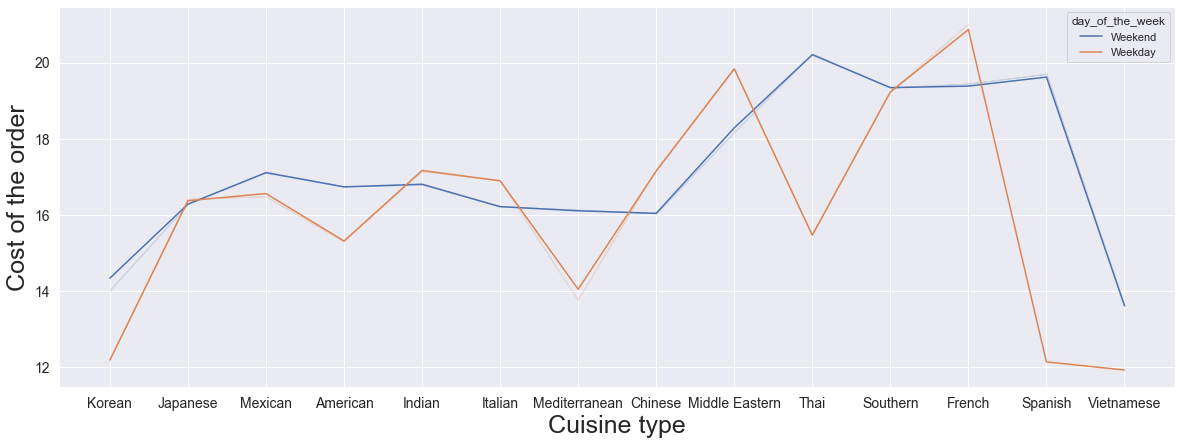

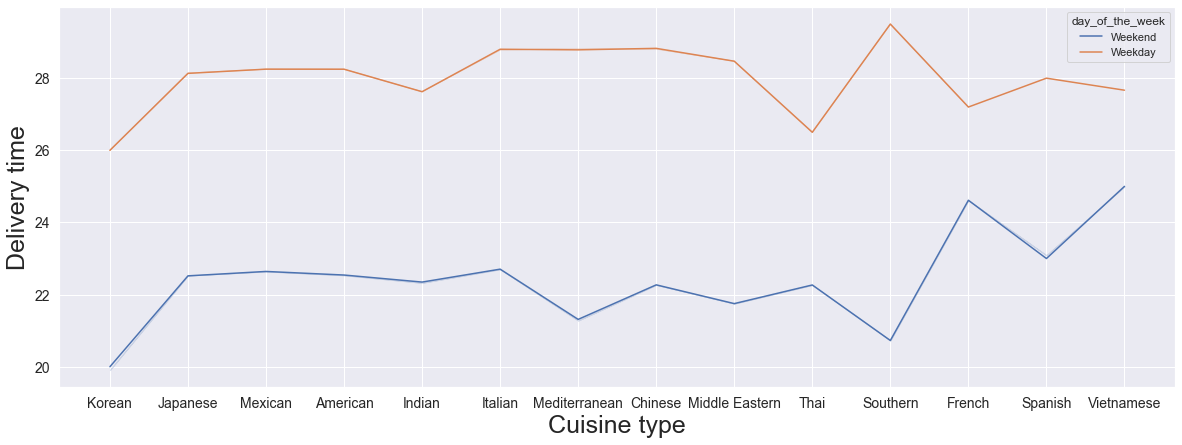

<Figure size 1440x504 with 0 Axes>

In [14]:




# Cost of the Order vs Cuisine type
plt.figure(figsize = (20, 7))
sns.lineplot(x = "cuisine_type", y = "cost_of_the_order", ci = 0, data = df, hue = 'day_of_the_week')
plt.ylabel('Cost of the order', size=25)
plt.xlabel('Cuisine type', size=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


# Cuisine type vs Delivery time'
plt.figure(figsize = (20, 7))
sns.lineplot(x = "cuisine_type", y = "delivery_time", ci = 0, data = df, hue = 'day_of_the_week')
plt.ylabel('Delivery time', size=25)
plt.xlabel('Cuisine type', size=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# cost_of_the_order vs food_preparation_time
plt.figure(figsize = (20, 7))
sns.set_theme(style="whitegrid")



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

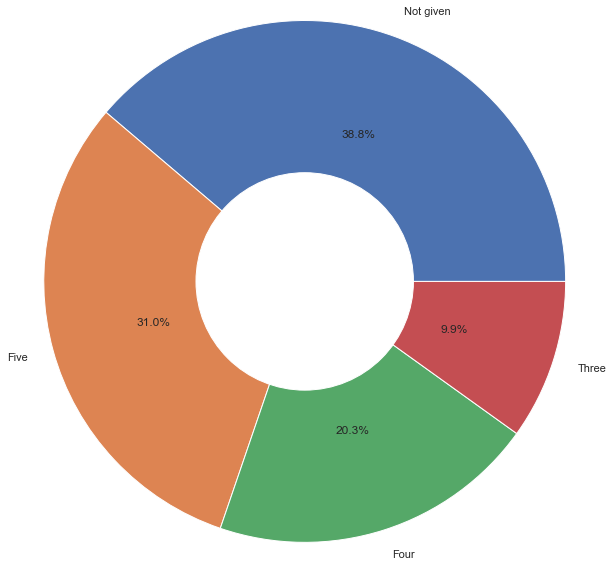

,restaurant_name,Count_of_ratings,Mean_of_ratings
16,Blue Ribbon Fried Chicken,64,4.328125
17,Blue Ribbon Sushi,73,4.219178
104,RedFarm Broadway,41,4.243902
117,Shake Shack,133,4.278195
132,The Meatball Shop,84,4.511905


In [15]:

# pie plot
    
plt.figure(figsize = (20, 10))  
plt.pie(df.rating.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Not given', 'Five','Four','Three'])

#add a circle at the center
circle =  plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)


 
# display the plot
plt.show()

hf=df[df.rating !='Not given'] # ignore data with 'Not given'
#df2= df.replace('Not given', np.nan)

hf.rating=hf['rating'].astype(int) #convert into int

agg_count=hf.groupby('restaurant_name')['rating'].count().reset_index(name='Count_of_ratings') #group by counts
agg_mean=hf.groupby('restaurant_name')['rating'].mean().reset_index(name='Mean_of_ratings')  #group by mean

agg_count['Mean_of_ratings']=agg_mean.Mean_of_ratings #add a column to
agg_count[(agg_count.Count_of_ratings > 40) & (agg_count.Mean_of_ratings > 4)]




#### Observations:
The data shows that 38.8% of the restaurants were not rated. The minimum rating iven by customers is 3 and the maximum is 5. The 5 restaurants got a rating count of more than 50 with the average rating  greater than 4. 
The names of these restaurants are the following:Blue Ribbon Fried Chicken, Blue Ribbon Sushi, RedFarm Broadway, Shake Shack		and The Meatball Shop.		

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [16]:
df1=df[df.cost_of_the_order>20]# cost of the order >20
df1['Revenue']=df1.cost_of_the_order*.25 #charges for cost greater than 25%
df2=df[(df.cost_of_the_order>5) & (df.cost_of_the_order<=20)]# cost of the order >5
df2['Revenue']=df2.cost_of_the_order*.15  #charges for cost greater than 15%
Net_revenue=df1.Revenue.sum()+df2.Revenue.sum() #net revenue
round(Net_revenue,2)

6166.3

#### Observations:
The the net revenue generated by the company across all orders is 6166.3 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [17]:
df['total_time']=df.food_preparation_time+df.delivery_time
round(df[df.total_time>60].total_time.count()/df.total_time.count()*100,2)

10.54

#### Observations:
10.54% of of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

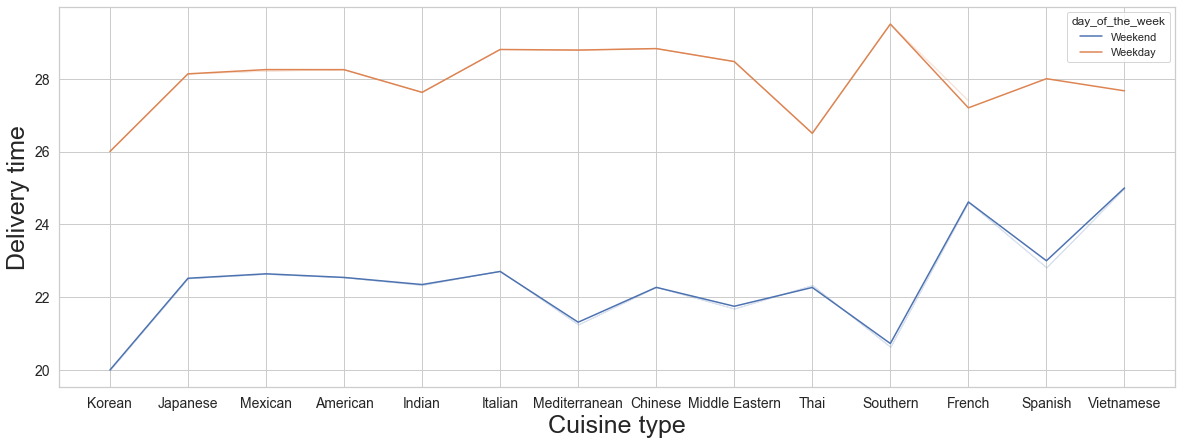

,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


In [18]:



plt.figure(figsize = (20, 7))
sns.lineplot(x = "cuisine_type", y = "delivery_time", ci = 0, data = df, hue = 'day_of_the_week')
plt.ylabel('Delivery time', size=25)
plt.xlabel('Cuisine type', size=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

df.delivery_time
round(df.pivot_table(index = 'day_of_the_week', values = 'delivery_time', aggfunc='mean'),2)

#### Observations:
Weekdays delivary time is greater than on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- American Cuisines are the most popular cuisine on weekends.
- Weekdays delivary time is greater than on weekends.
- Blue Ribbon Fried Chicken restaurant got higher mean rating.
- Korean and Vietnamese cuisines are relatively cheaper, while French cuisines are more expensive.



### Recommendations:

The delivary time on weekends is less than on weekdays. Limiting the distance beetween the restaurant and delivary locations can further decrease the delivary time, especially during weekdays. It is also recommended to give promotion in the weekdays to attract more delivery persons, this will decrease the deliveary times on weekdays. 

---